<a href="https://colab.research.google.com/github/Nehal1920/Nehal1920/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

In [ ]:
#Get the data
df = pd.read_csv('covid19_tweets.csv',engine='python')

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
# Check Columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
df.shape

(57464, 13)

In [ ]:
# Datatype
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
dtype: object

In [ ]:
df1 = df.iloc[:1000,:]
df2 = df.iloc[1000:,:]

In [ ]:
df1.shape

(1000, 13)

In [85]:
df1['text']

0      If I smelled the scent of hand sanitizers toda...
1      Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2      @diane3443 @wdunlap @realDonaldTrump Trump nev...
3      @brookbanktv The one gift #COVID19 has give me...
4      25 July : Media Bulletin on Novel #CoronaVirus...
                             ...                        
995    @CassieCeleste @lobster_nanny I do understand....
996    My job isn’t to enlighten you #fuck #alreadyvi...
997    #COVID19 reflection in a street art, #Kharkiv,...
998    Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...
999    Treat every single decision you take regarding...
Name: text, Length: 1000, dtype: object

In [ ]:
df2.shape

(56464, 13)

In [ ]:
# Source/ Value Count/Distribution of the Sources
df1['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [ ]:
# Source/ Value Count/Distribution of the Sources
df1['source'].value_counts()

Twitter Web App        250
Twitter for Android    248
Twitter for iPhone     212
TweetDeck               56
Hootsuite Inc.          43
                      ... 
Peeping Moon             1
TweetAutomaticos         1
Orlo                     1
Meltwater Social         1
Twitter Ads              1
Name: source, Length: 74, dtype: int64

In [ ]:
# Plot the top value_counts
df1['source'].value_counts().nlargest(10)

Twitter Web App            250
Twitter for Android        248
Twitter for iPhone         212
TweetDeck                   56
Hootsuite Inc.              43
preprint-alert              27
Twitter for iPad            18
Buffer                      11
Sprout Social                9
TweetCaster for Android      7
Name: source, dtype: int64

<Axes: >

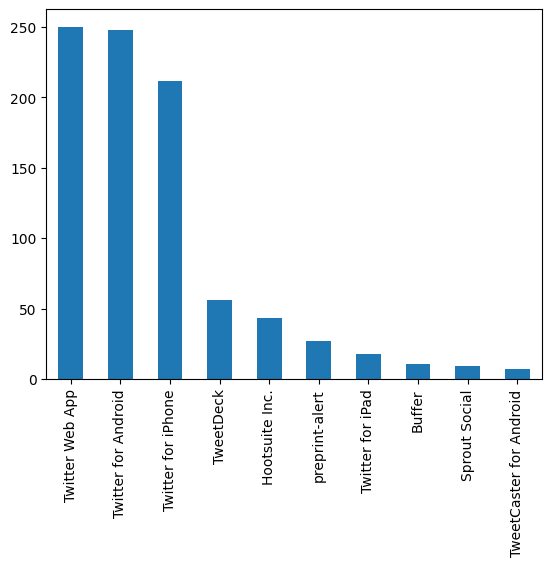

In [ ]:
# Plot the top value_counts
df1['source'].value_counts().nlargest(10).plot(kind='bar')

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
# Load Text Cleaning Package
import neattext.functions as nfx

In [ ]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df1['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

In [ ]:
df1['text'].apply(nfx.extract_hashtags)

0                                                     []
1                                                     []
2                                             [#COVID19]
3                                             [#COVID19]
4                        [#CoronaVirusUpdates, #COVID19]
                             ...                        
995                                                   []
996    [#fuck, #alreadyvideo, #bitch, #die, #lovestor...
997                                [#COVID19, #Kharkiv,]
998                                                   []
999                                                   []
Name: text, Length: 1000, dtype: object

In [ ]:
df1['extracted_hashtags'] = df1['text'].apply(nfx.extract_hashtags)

<ipython-input-26-efbb6f89a704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['extracted_hashtags'] = df1['text'].apply(nfx.extract_hashtags)


In [ ]:
df1[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,[],NaN
1,[],NaN
2,[#COVID19],['COVID19']
3,[#COVID19],['COVID19']
4,"[#CoronaVirusUpdates, #COVID19]","['CoronaVirusUpdates', 'COVID19']"
...,...,...
995,[],NaN
996,"[#fuck, #alreadyvideo, #bitch, #die, #lovestor...","['fuck', 'alreadyvideo', 'bitch', 'die', 'love..."
997,"[#COVID19, #Kharkiv,]","['COVID19', 'Kharkiv']"
998,[],NaN


In [28]:
# Cleaning Text
df1['clean_tweet'] = df1['text'].apply(nfx.remove_hashtags)

<ipython-input-28-5f9e0ce44940>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_tweet'] = df1['text'].apply(nfx.remove_hashtags)


In [29]:
df1[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
995,@CassieCeleste @lobster_nanny I do understand....,@CassieCeleste @lobster_nanny I do understand....
996,My job isn’t to enlighten you #fuck #alreadyvi...,My job isn’t to enlighten you
997,"#COVID19 reflection in a street art, #Kharkiv,...","reflection in a street art, Ukraine https:..."
998,Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...,Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...


In [30]:
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

<ipython-input-30-6032c091c13d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))


In [31]:
df1[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n ...
...,...,...
995,@CassieCeleste @lobster_nanny I do understand....,"I do understand. In 2017, we suffered a st..."
996,My job isn’t to enlighten you #fuck #alreadyvi...,My job isn’t to enlighten you
997,"#COVID19 reflection in a street art, #Kharkiv,...","reflection in a street art, Ukraine https:..."
998,Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...,Nice Read.\n \n \n \nRea… https://...


In [32]:
df1['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [33]:
# Cleaning Text: Multiple WhiteSpaces
df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_multiple_spaces)

<ipython-input-33-ff0c5aec6753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_multiple_spaces)


In [34]:
df1['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [35]:
# Cleaning Text : Remove urls
df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_urls)

<ipython-input-35-af25764e1185>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_urls)


In [36]:
# Cleaning Text: Punctuations
df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_puncts)

<ipython-input-36-de798a209925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clean_tweet'] = df1['clean_tweet'].apply(nfx.remove_puncts)


In [40]:
df1[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
995,@CassieCeleste @lobster_nanny I do understand....,I do understand In 2017 we suffered a standar...
996,My job isn’t to enlighten you #fuck #alreadyvi...,My job isn’t to enlighten you
997,"#COVID19 reflection in a street art, #Kharkiv,...",reflection in a street art Ukraine
998,Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...,Nice Read Rea…


In [41]:
df1[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
995,@CassieCeleste @lobster_nanny I do understand....,I do understand In 2017 we suffered a standar...
996,My job isn’t to enlighten you #fuck #alreadyvi...,My job isn’t to enlighten you
997,"#COVID19 reflection in a street art, #Kharkiv,...",reflection in a street art Ukraine
998,Nice Read.\n@MoriangoJr @AdanZamuh @kunga_ @mo...,Nice Read Rea…


SENTIMENT ANALYSIS

In [42]:
from textblob import TextBlob


In [43]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [44]:
# Text
ex1 = df1['clean_tweet'].iloc[0]

In [45]:
get_sentiment(ex1)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [46]:
df1['sentiment_results'] = df1['clean_tweet'].apply(get_sentiment)

<ipython-input-46-c77fedb04d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment_results'] = df1['clean_tweet'].apply(get_sentiment)


In [47]:
df1['sentiment_results']

0      {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1      {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3      {'polarity': 0.0, 'subjectivity': 0.3571428571...
4      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                             ...                        
995    {'polarity': 0.0, 'subjectivity': 0.25, 'senti...
996    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
997    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
998    {'polarity': 0.6, 'subjectivity': 1.0, 'sentim...
999    {'polarity': -0.07142857142857142, 'subjectivi...
Name: sentiment_results, Length: 1000, dtype: object

In [48]:
df1['sentiment_results'].iloc[0]

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [50]:
pd.json_normalize(df1['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.25,0.25,Negative


In [51]:

df1 = df1.join(pd.json_normalize(df1['sentiment_results']))

In [52]:
df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [53]:
df1['sentiment'].value_counts()

Neutral     419
Positive    410
Negative    171
Name: sentiment, dtype: int64

<Axes: >

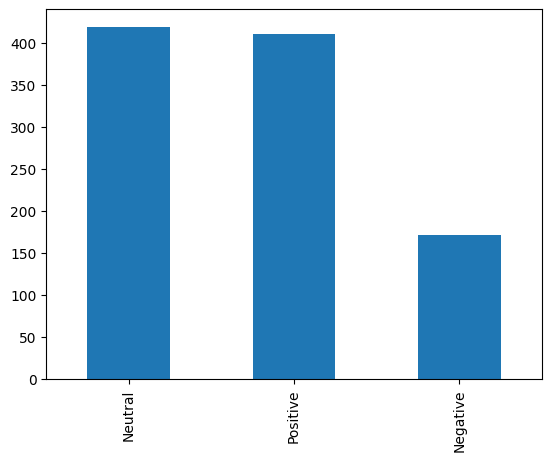

In [54]:
df1['sentiment'].value_counts().plot(kind='bar')

In [55]:
# Plot with seaborn
sns.countplot(df1['sentiment'])

ValueError: ignored

In [56]:
### Keyword Extraction

positive_tweet = df1[df1['sentiment'] == 'Positive']['clean_tweet']

In [57]:
neutral_tweet = df1[df1['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df1[df1['sentiment'] == 'Negative']['clean_tweet']

In [58]:
positive_tweet

1      Hey and  wouldnt it have made more sense to ha...
6      How Will Change Work in General (and recruitin...
8              Praying for good health and recovery of  
12     👋🏻 — no one will be safe from until everyone i...
13     Lets all protect ourselves from Its real and t...
                             ...                        
983    Calling for clean air and safe cycling on the ...
985               Canada drug imports better than China 
993    Wake up America New Jersey can close gym that ...
994     Update from Biggest ever single day spike of ...
998                                      Nice Read Rea… 
Name: clean_tweet, Length: 410, dtype: object

In [59]:
#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100
pos_per = calc_percentage(len(positive_tweet), len(df1))
neg_per = calc_percentage(len(negative_tweet), len(df1))
neu_per = calc_percentage(len(neutral_tweet), len(df1))
print("positive: {} {}%".format(len(positive_tweet),  format(pos_per, '.1f')))
print("negative: {} {}%".format(len(negative_tweet), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(neutral_tweet), format(neu_per, '.1f')))
format(calc_percentage(len(neutral_tweet), len(df1)), '.1f')

positive: 410 41.0%
negative: 171 17.1%
neutral: 419 41.9%


'41.9'

In [60]:
import matplotlib.pyplot as plt

In [ ]:
#CREATE A PIE CHART

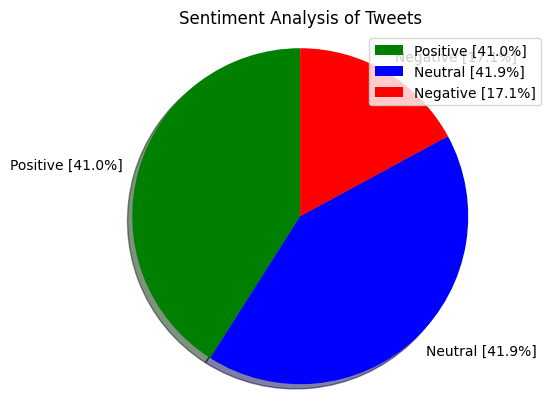

In [61]:
labels = ['Positive ['+format(pos_per, '.1f')+'%]', 'Neutral ['+format(neu_per,'.1f')+'%]', 'Negative ['+format(neg_per,'.1f')+'%]']
sizes = [len(positive_tweet), len(neutral_tweet), len(negative_tweet)]
colors = ['green', 'blue', 'red']
patches, texts = plt.pie(sizes, labels = labels, colors = colors,shadow = True, startangle = 90)
plt.legend(labels)
plt.title("Sentiment Analysis of Tweets")
plt.axis('equal')
plt.show()

In [62]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [63]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [64]:
positive_tweet_list 

['Hey wouldnt sense players pay respects A…',
 'Change Work General (and recruiting specifically) via/',
 'Praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'Second wave Flandersback',
 'COVID Update: infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review amp Analysis: key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'CEO live WSU talking “The effects Covid19 students”…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'released new podcast episodes week: Technology Platforms Conduct Telehealth Visits C…',
 'reports 1142 positive cases 29 deaths Saturday Death toll rises 3

In [65]:
# Tokenization
for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

Hey
wouldnt
sense
players
pay
respects
A…
Change
Work
General
(and
recruiting
specifically)
via/
Praying
good
health
recovery
👋🏻
—
safe
safe
commit
ensure…
Lets
protect
real
numbers
climbing
fast
Continent
Lets
n…
Second
wave
Flandersback
COVID
Update:
infection
rate
Florida
following
natural
curve
experts
predicted
initial
cu…
Good
Patriots
Volunteer
Election
Judge
Polls
open
without…
comprehensive
review
amp
Analysis:
key
ways
WASH
help
reduce
transmission…
crosses
2
lakh
mark
150055
ppp
recovered
far
positive
today
6988/total…
Actor
father
MrGKReddy
tested
positive
15/20
days
s…
safe
place
visit
guests
said
hotel
meticulous
applying
hand
sanitation
als…
CEO
live
WSU
talking
“The
effects
Covid19
students”…
Actionables
healthy
recovery
understood
hadnt
missed
meeting
In…
released
new
podcast
episodes
week:
Technology
Platforms
Conduct
Telehealth
Visits
C…
reports
1142
positive
cases
29
deaths
Saturday
Death
toll
rises
3806
reports
ANI
quot…
Venezuelas
Economy/Budget
tied
Oil
like
Loui

In [66]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [67]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [68]:
pos_tokens

['Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '👋🏻',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'Second',
 'wave',
 'Flandersback',
 'COVID',
 'Update:',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'Analysis:',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'MrGKReddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous

In [69]:
# Get Most Commonest Keywords
from collections import Counter

In [70]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [71]:
get_tokens(pos_tokens)

{'new': 55,
 'cases': 53,
 'positive': 31,
 'New': 30,
 'deaths': 26,
 'people': 23,
 'tested': 22,
 'COVID19': 22,
 'amp': 21,
 'preprint:': 18,
 'safe': 15,
 'pandemic': 14,
 'today': 12,
 'like': 12,
 'mask': 11,
 'latest': 11,
 'help': 10,
 'social': 10,
 'days': 9,
 '1142': 9,
 'government': 9,
 'better': 9,
 '7813': 9,
 'father': 8,
 'reports': 8,
 '29': 8,
 'death': 8,
 'Total': 8,
 'good': 7,
 'recovery': 7}

In [72]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [73]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [74]:
neg_df

,words,scores
0,cases,17
1,spread,17
2,risk,12
3,amp,12
4,slow,12
5,people,11
6,long,10
7,COVID19,10
8,time,9
9,y…,9


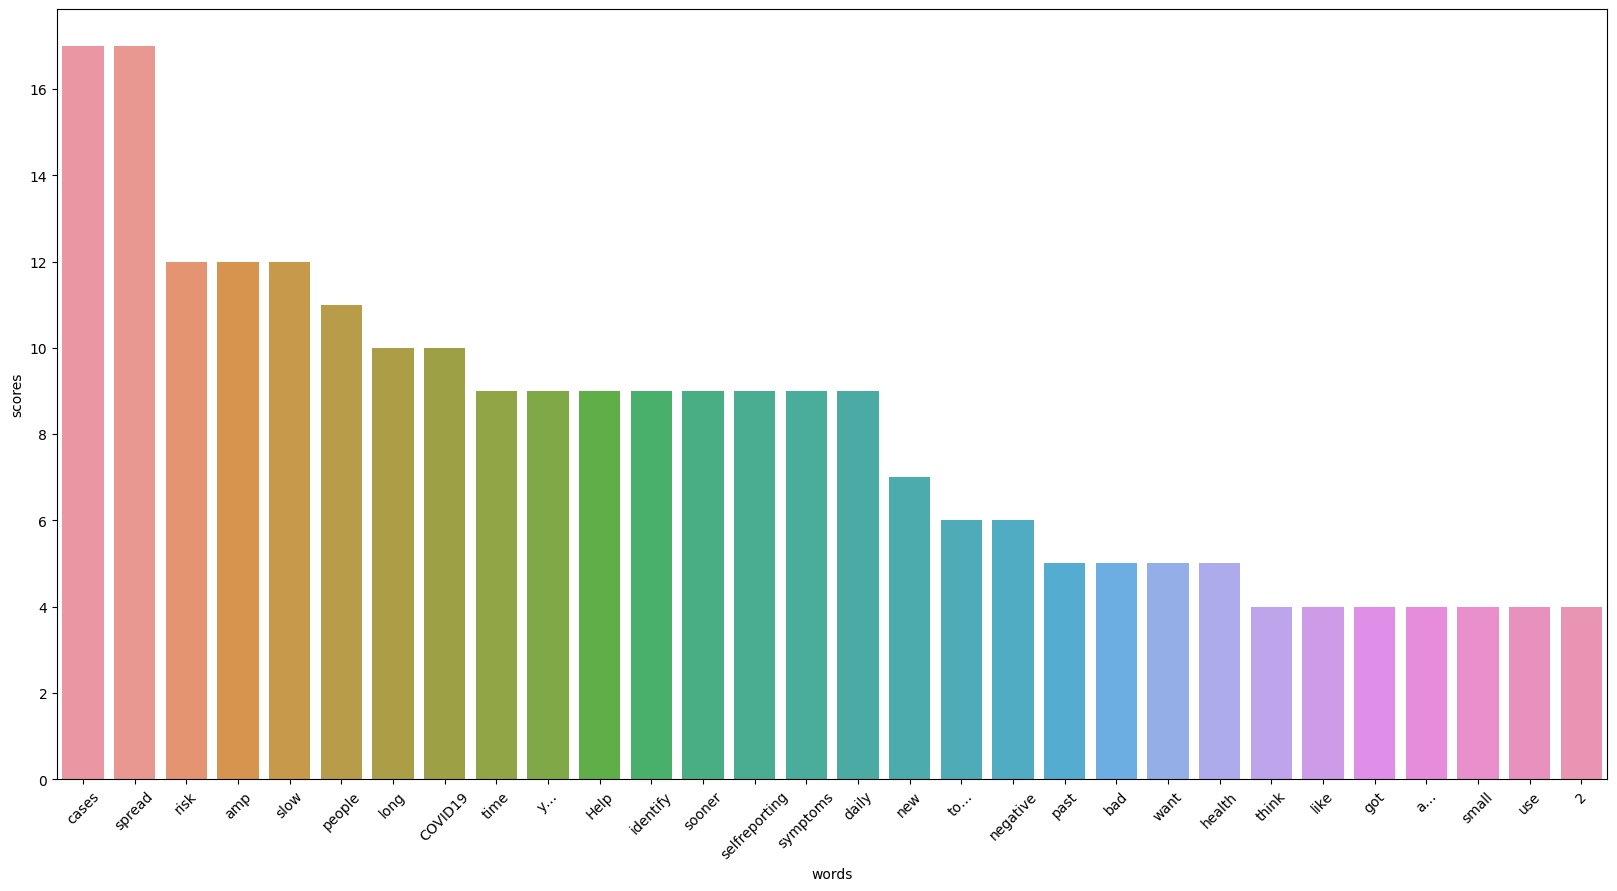

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

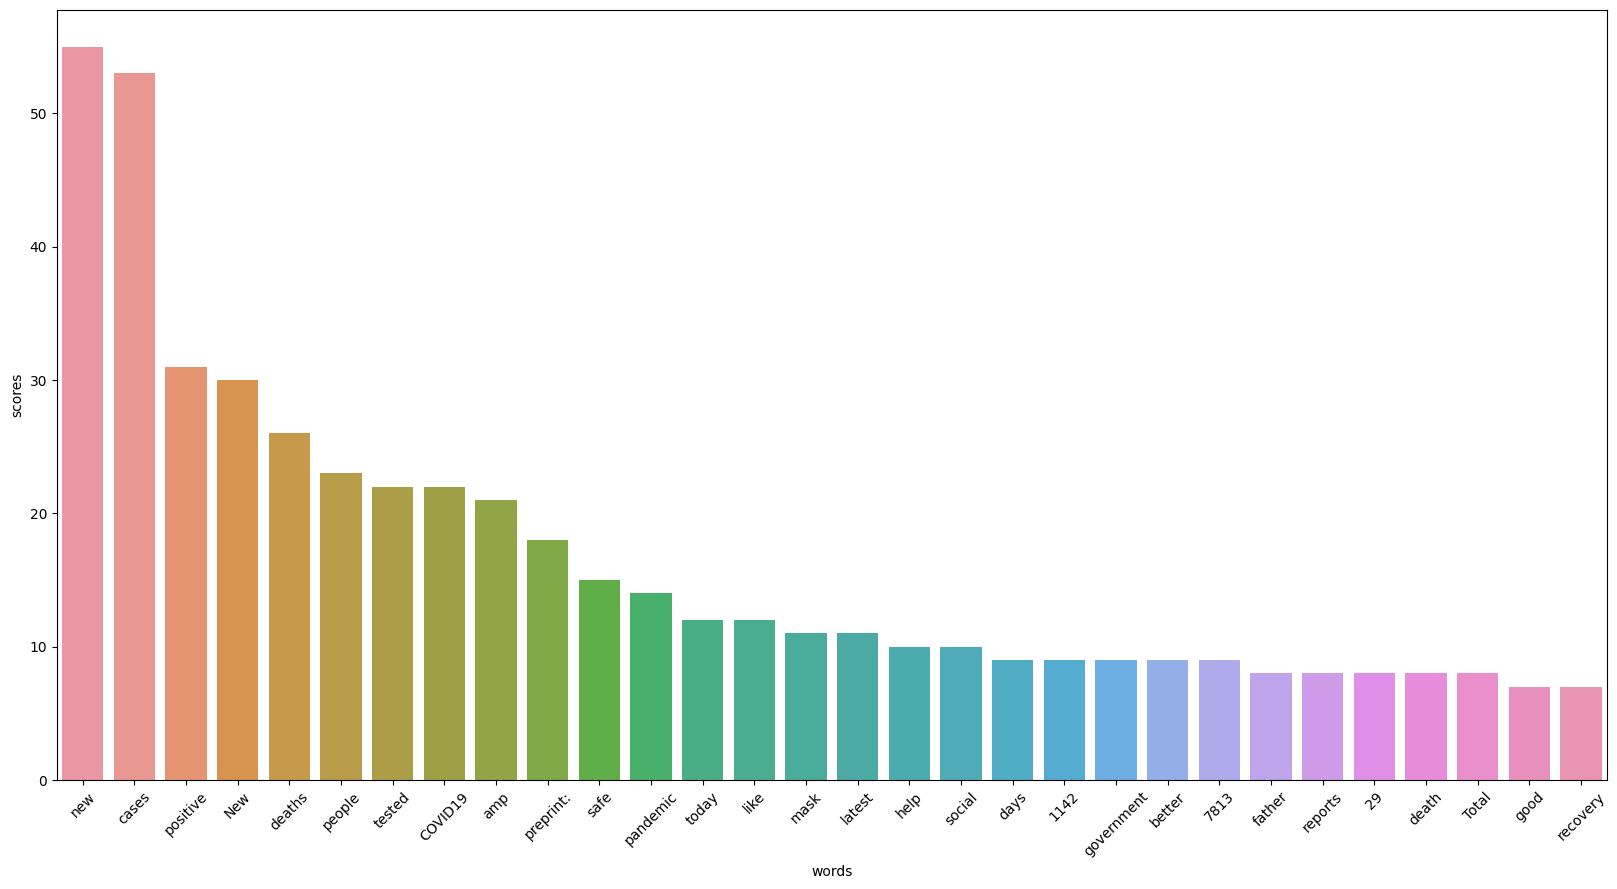

In [76]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

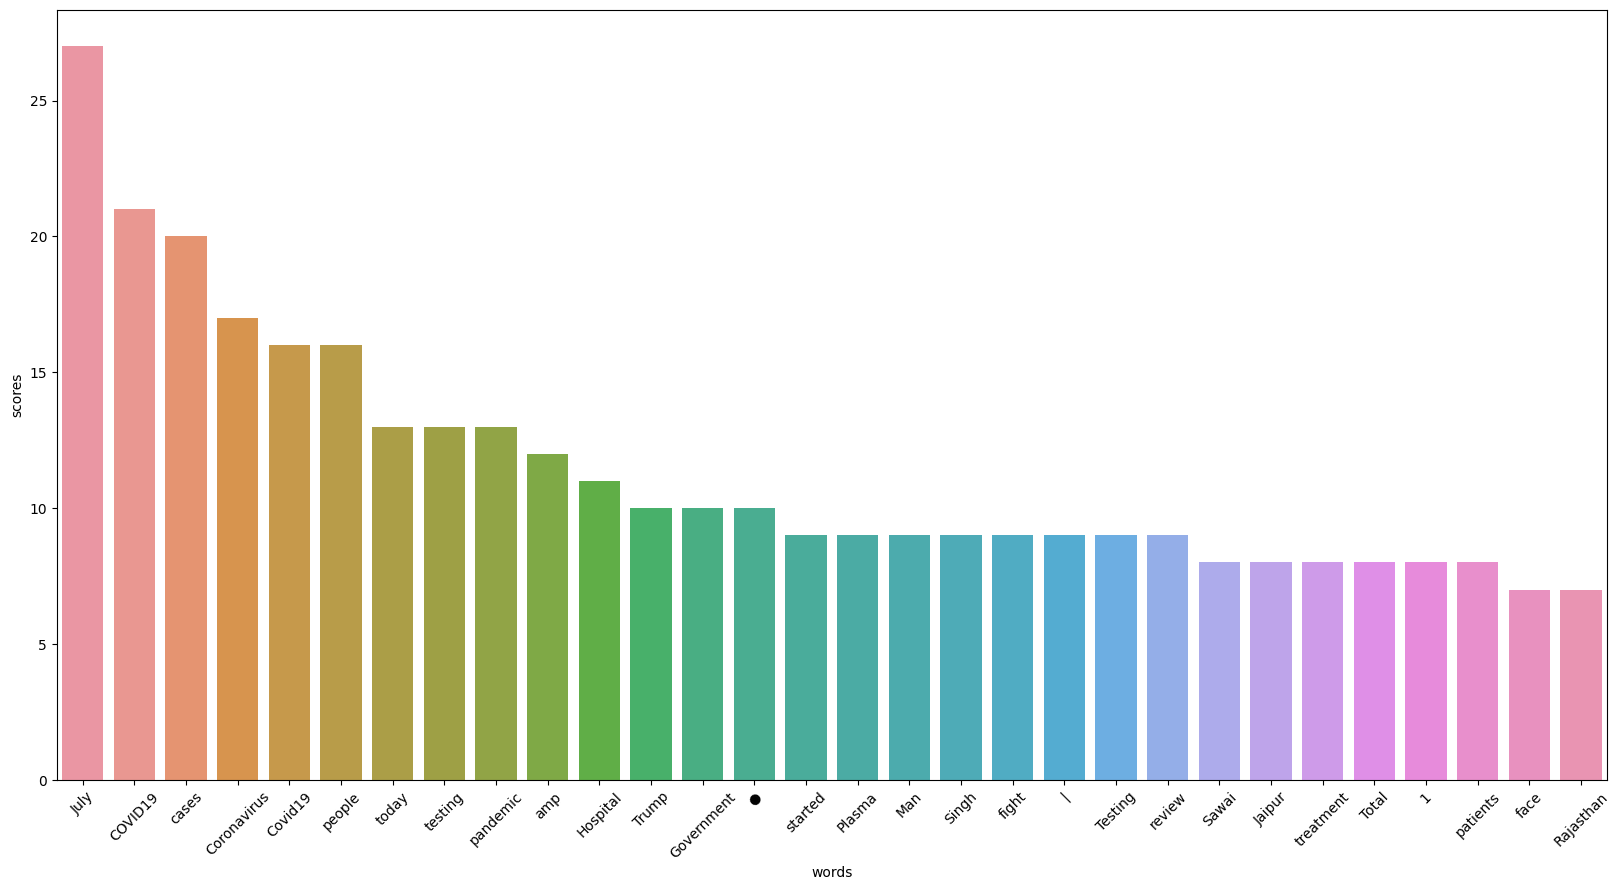

In [77]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [82]:
neut_df

,words,scores
0,July,27
1,COVID19,21
2,cases,20
3,Coronavirus,17
4,Covid19,16
5,people,16
6,today,13
7,testing,13
8,pandemic,13
9,amp,12


In [78]:
### Word Cloud
from wordcloud import WordCloud

In [79]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [80]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

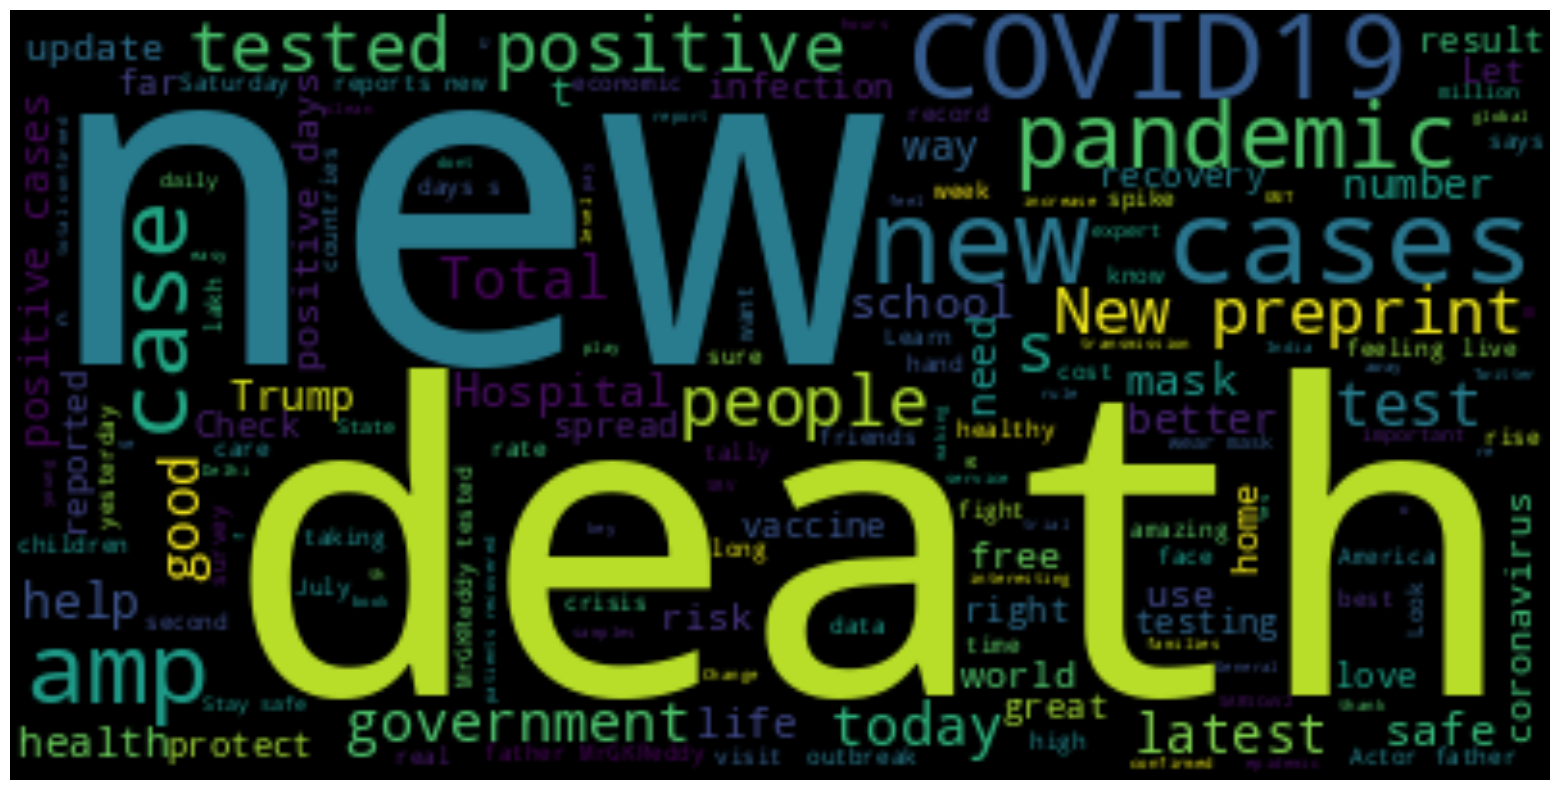

In [81]:
plot_wordcloud(pos_docx)

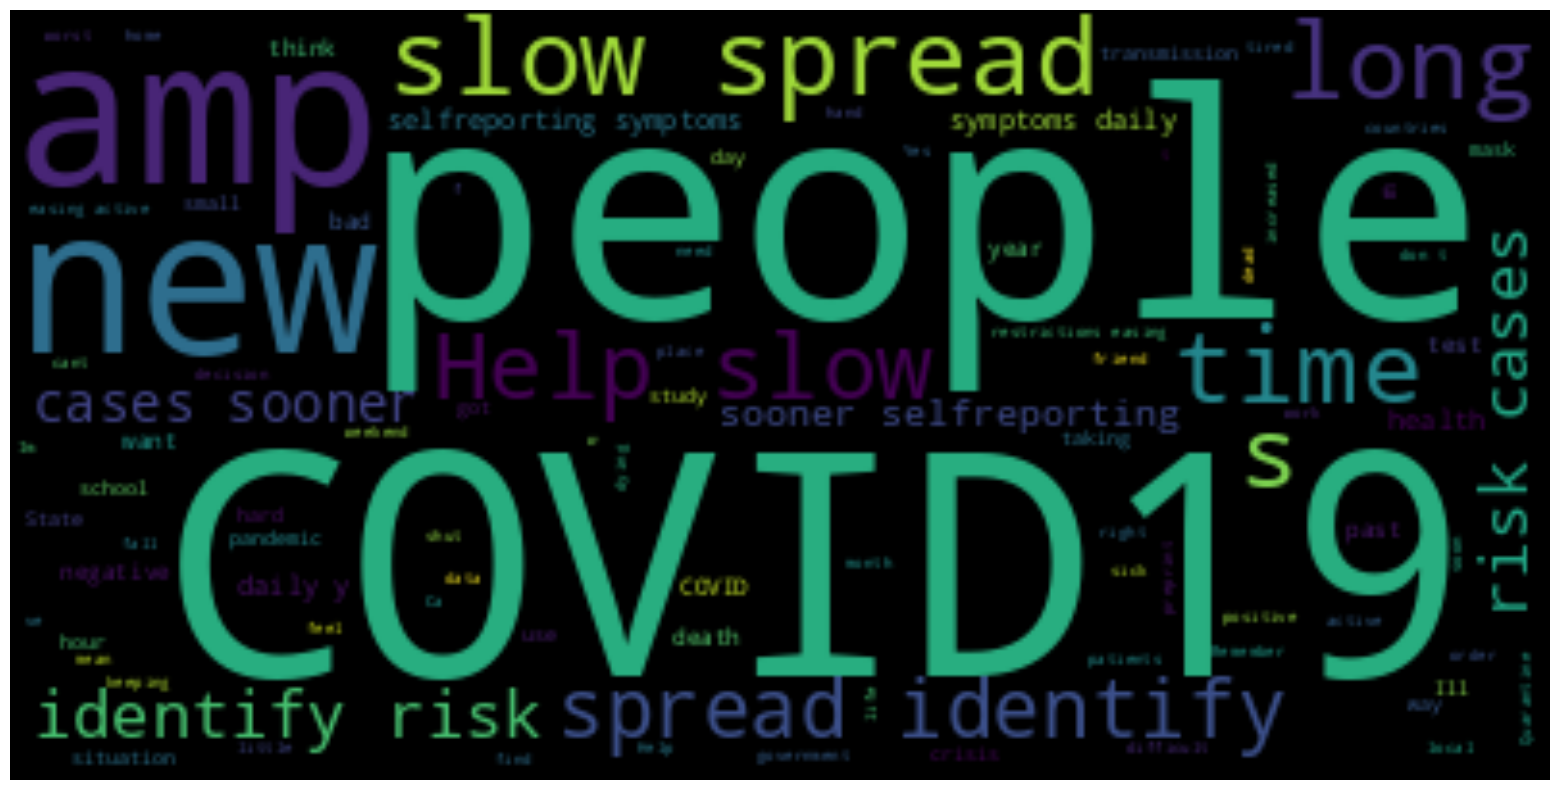

In [83]:
plot_wordcloud(neg_docx)

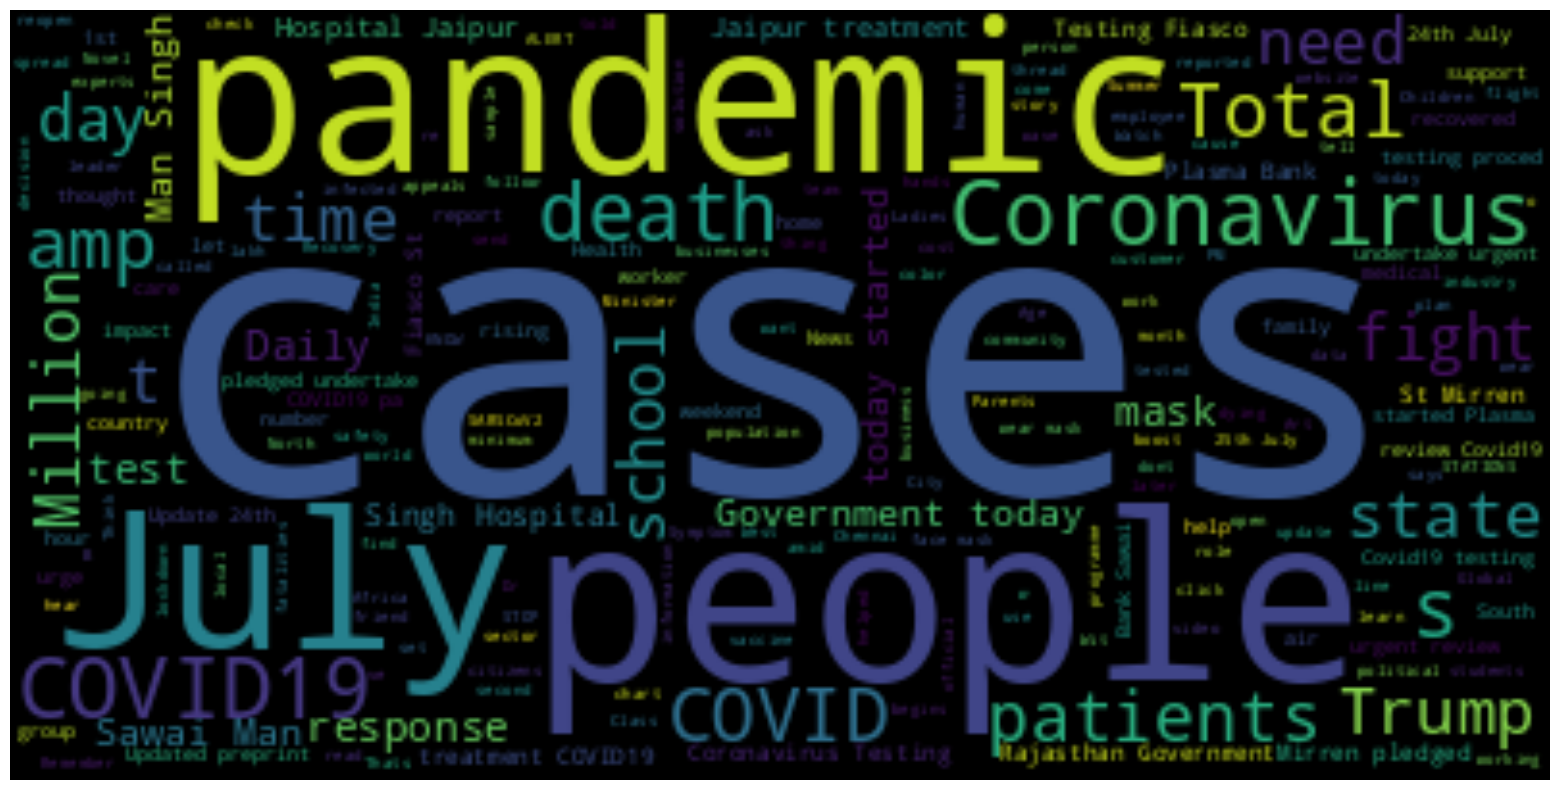

In [84]:
plot_wordcloud(neu_docx)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for index, row in tweets_df['Text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        tweets_df.loc[index, "Sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        tweets_df.loc[index, "Sentiment"] = "positive"
    else:
        tweets_df.loc[index, "Sentiment"] = "neutral"
        
    tweets_df.loc[index, 'neg'] = score['neg']
    tweets_df.loc[index, 'neu'] = score['neu']
    tweets_df.loc[index, 'pos'] = score['pos']
    tweets_df.loc[index, 'compound'] = score['compound']
    
tweets_df.head(10)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


NameError: ignored

In [ ]:
import GetOldTweets3 as got
  
def extract_tweets(hashtag):
      
    gettweet= got.manager.TweetCriteria().setQuerySearch(hashtag) \
        .setSince("2020-01-01") \
        .setUntil("2020-05-01") \
        .setMaxTweets(100)
      
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(gettweet)
      
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    print(text_tweets)
  
# calling the function
extract_tweets('COVID19')

ModuleNotFoundError: ignored